# Decision Trees

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
np.random.seed(42)

In [95]:
df_iris = pd.read_csv('iris.csv')

In [96]:
df_iris = df_iris.iloc[:100]
df_iris = df_iris.sample(frac=1).reset_index(drop=True)
df_iris['species'] = df_iris['species'].astype('category').cat.codes

In [97]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.0,2.7,5.1,1.6,1
1,5.5,2.3,4.0,1.3,1
2,5.9,3.2,4.8,1.8,1
3,4.8,3.0,1.4,0.3,0
4,5.1,3.8,1.9,0.4,0


In [98]:
X_train = df_iris[['sepal_length', 'sepal_width']][:67].values
Y_train = df_iris['species'][:67]

X_test = df_iris[['sepal_length', 'sepal_width']][67:].values
Y_test = df_iris['species'][67:]

print("X_train.shape: {}".format(X_train.shape))
print("Y_train.shape: {}".format(Y_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("Y_test.shape: {}".format(Y_test.shape))

X_train.shape: (67, 2)
Y_train.shape: (67,)
X_test.shape: (33, 2)
Y_test.shape: (33,)


In [99]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [100]:
from sklearn.metrics import accuracy_score
Y_pred = clf.predict(X_test)
accuracy_score(Y_pred, Y_test)

0.9090909090909091

In [101]:
h = 0.01
x_min, x_max = X_train[:, 0].min()-1, X_train[:, 0].max()+1
y_min, y_max = X_train[:, 1].min()-1, X_train[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

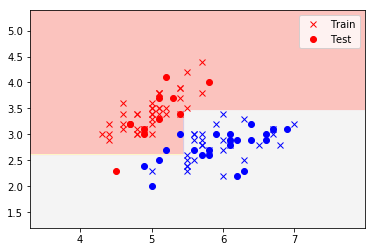

In [102]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.plot(X_train[Y_train == 0][:, 0], X_train[Y_train == 0][:, 1], 'rx', label='Train')
plt.plot(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], 'bx')
plt.plot(X_test[Y_test == 0][:, 0], X_test[Y_test == 0][:, 1], 'ro', label='Test')
plt.plot(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], 'bo')
plt.legend()
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.8)

In [103]:
from sklearn.datasets import make_classification
classification_problem = make_classification(n_features = 2, n_informative = 2, 
                                                      n_classes = 3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)

In [104]:
X_train = classification_problem[0]
Y_train = classification_problem[1]

In [105]:
from matplotlib.colors import ListedColormap
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

In [106]:
[x[0] for x in X_train]

[2.2188665057293804,
 2.0716999622963375,
 -1.9397726230603818,
 2.084367592196723,
 0.9499837198146149,
 -0.3878893015851287,
 1.9811853378751305,
 1.6550813432127125,
 2.6099669077650045,
 -0.29137472144777643,
 -0.9841873277223523,
 -0.1539987740152815,
 -0.22167728656714591,
 2.8828504835642015,
 1.1745974264933627,
 -0.3170407482612676,
 1.480235272006499,
 1.5186325223070436,
 -0.7044120982613213,
 1.0606055752601515,
 3.0423762584271783,
 -1.6067147272780344,
 -0.24102129872319866,
 1.8878332768891837,
 0.12865420044004594,
 -1.6842897136105561,
 -0.7699090953242809,
 3.0636560206884202,
 -1.0647493513468755,
 -0.34416852827446065,
 2.134049828827021,
 1.125638523684688,
 2.00005500499144,
 2.071351108203449,
 0.8011322915203358,
 2.6236833311356085,
 1.093909041892914,
 -0.11838509655735496,
 1.173334438647049,
 -1.1156507966410545,
 -0.8112854052895109,
 -0.2891178630714162,
 3.4545448331841624,
 0.02133037153021533,
 0.5984125912923005,
 0.997926860405717,
 -0.856449428147249

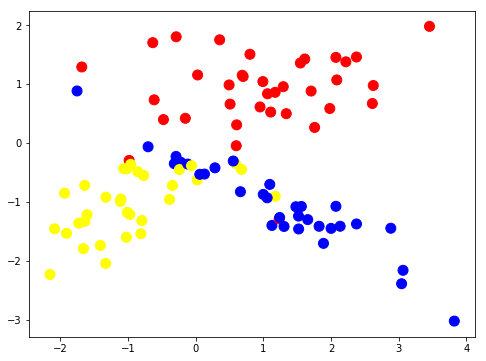

In [107]:
plt.figure(figsize=(8,6))
plt.scatter([x[0] for x in X_train], [x[1] for x in X_train],
              c=Y_train, cmap=colors, s=100)

In [108]:
X_train.shape

(100, 2)

In [109]:
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_train)
accuracy_score(Y_train, Y_pred)

1.0

In [110]:
h = 0.01
x_min, x_max = X_train[:, 0].min()-1, X_train[:, 0].max()+1
y_min, y_max = X_train[:, 1].min()-1, X_train[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

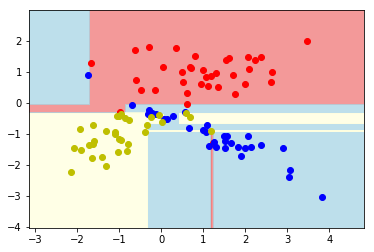

In [111]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.plot(X_train[Y_train == 0][:, 0], X_train[Y_train == 0][:, 1], 'ro')
plt.plot(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], 'bo')
plt.plot(X_train[Y_train == 2][:, 0], X_train[Y_train == 2][:, 1], 'yo')
plt.contourf(xx, yy, Z, cmap=light_colors, alpha=0.8)

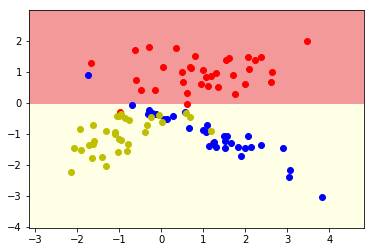

In [112]:
clf = DecisionTreeClassifier(random_state=42, max_depth = 1)
clf.fit(X_train, Y_train)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.plot(X_train[Y_train == 0][:, 0], X_train[Y_train == 0][:, 1], 'ro')
plt.plot(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], 'bo')
plt.plot(X_train[Y_train == 2][:, 0], X_train[Y_train == 2][:, 1], 'yo')
plt.contourf(xx, yy, Z, cmap=light_colors, alpha=0.8)

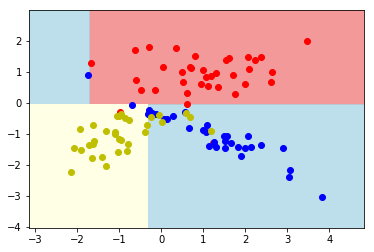

In [113]:
clf = DecisionTreeClassifier(random_state=42, max_depth = 2)
clf.fit(X_train, Y_train)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.plot(X_train[Y_train == 0][:, 0], X_train[Y_train == 0][:, 1], 'ro')
plt.plot(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], 'bo')
plt.plot(X_train[Y_train == 2][:, 0], X_train[Y_train == 2][:, 1], 'yo')
plt.contourf(xx, yy, Z, cmap=light_colors, alpha=0.8)

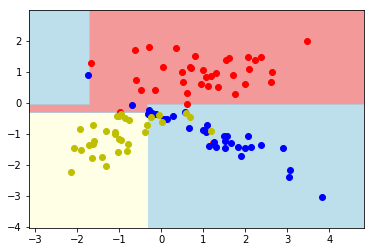

In [114]:
clf = DecisionTreeClassifier(random_state=42, max_depth = 3)
clf.fit(X_train, Y_train)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.plot(X_train[Y_train == 0][:, 0], X_train[Y_train == 0][:, 1], 'ro')
plt.plot(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], 'bo')
plt.plot(X_train[Y_train == 2][:, 0], X_train[Y_train == 2][:, 1], 'yo')
plt.contourf(xx, yy, Z, cmap=light_colors, alpha=0.8)

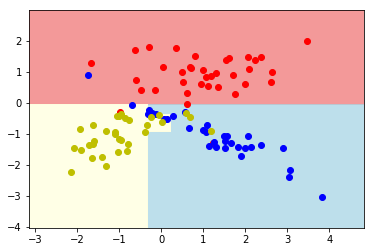

In [115]:
clf = DecisionTreeClassifier(random_state=42, min_samples_leaf = 5)
clf.fit(X_train, Y_train)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.plot(X_train[Y_train == 0][:, 0], X_train[Y_train == 0][:, 1], 'ro')
plt.plot(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], 'bo')
plt.plot(X_train[Y_train == 2][:, 0], X_train[Y_train == 2][:, 1], 'yo')
plt.contourf(xx, yy, Z, cmap=light_colors, alpha=0.8)

# Random Forest

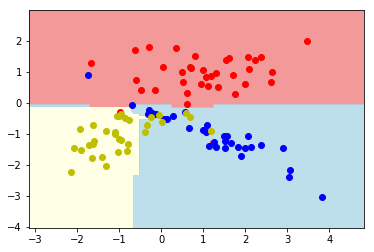

In [125]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 50, max_depth = 2, random_state = 1)
clf.fit(X_train, Y_train)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.plot(X_train[Y_train == 0][:, 0], X_train[Y_train == 0][:, 1], 'ro')
plt.plot(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], 'bo')
plt.plot(X_train[Y_train == 2][:, 0], X_train[Y_train == 2][:, 1], 'yo')
plt.contourf(xx, yy, Z, cmap=light_colors, alpha=0.8)

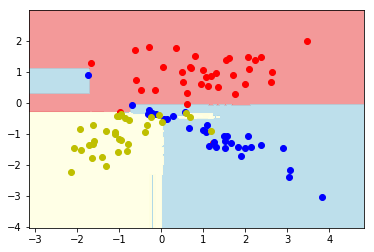

In [118]:
clf = RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state = 1)
clf.fit(X_train, Y_train)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.plot(X_train[Y_train == 0][:, 0], X_train[Y_train == 0][:, 1], 'ro')
plt.plot(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], 'bo')
plt.plot(X_train[Y_train == 2][:, 0], X_train[Y_train == 2][:, 1], 'yo')
plt.contourf(xx, yy, Z, cmap=light_colors, alpha=0.8)

# Gradient Boosting

In [120]:
import xgboost as xgb

In [123]:
gr_boost = xgb.XGBClassifier(n_estimators = 150, max_depth = 2, random_state = 1)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


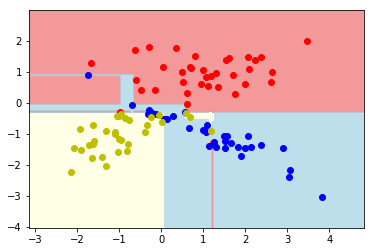

In [124]:
gr_boost.fit(X_train, Y_train)

Z = gr_boost.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.plot(X_train[Y_train == 0][:, 0], X_train[Y_train == 0][:, 1], 'ro')
plt.plot(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], 'bo')
plt.plot(X_train[Y_train == 2][:, 0], X_train[Y_train == 2][:, 1], 'yo')
plt.contourf(xx, yy, Z, cmap=light_colors, alpha=0.8)